<a href="https://colab.research.google.com/github/EDS-VU/BakeryVilnius/blob/main/PI_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2**

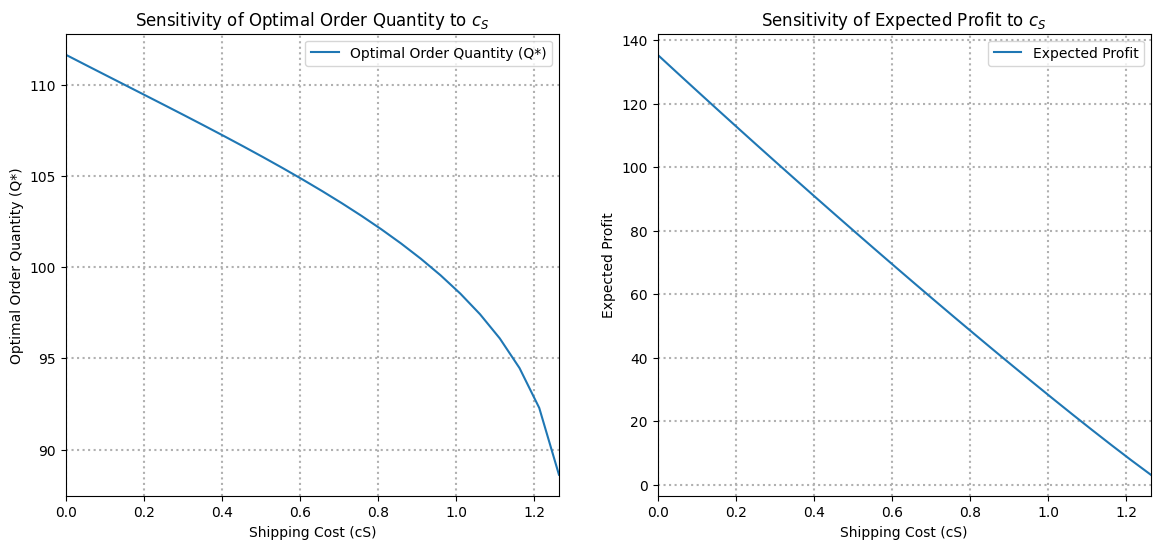

In [ ]:
import scipy.stats as sts
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

def profitFunction(Q, Y, c, p, cS, pL):
    pi = p * min(Q, Y) + pL * max(0, Q - Y) - (c + cS) * Q
    return pi

def showTheFigure(vCS, order_Optimal_Q, expected_profits):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(vCS, order_Optimal_Q, label='Optimal Order Quantity (Q*)')
    plt.xlabel('Shipping Cost (cS)')
    plt.ylabel('Optimal Order Quantity (Q*)')
    plt.title('Sensitivity of Optimal Order Quantity to $c_S$')
    plt.legend()
    plt.grid(True, linestyle=':', linewidth=1.5)
    plt.autoscale(axis='x', tight=True)
    plt.subplot(1, 2, 2)
    plt.plot(vCS, expected_profits, label='Expected Profit')
    plt.xlabel('Shipping Cost (cS)')
    plt.ylabel('Expected Profit')
    plt.title('Sensitivity of Expected Profit to $c_S$')
    plt.legend()
    plt.grid(True, linestyle=':', linewidth=1.5)
    plt.autoscale(axis='x', tight=True)

    plt.show()

def Q_star(c,cS,p,pL,mu,sigma):
    ratio = (p + pL - c - cS)/(p + pL)
    return sts.norm.ppf(ratio, mu, sigma)

def expected_profit(c,cS,p,pL,mu,sigma,Q):
    def integrand(y):
        profit = profitFunction(Q, y, c, p, cS, pL)
        density = sts.norm.pdf(y, mu, sigma)
        return profit * density

    integral_y = quad(lambda y: sts.norm.cdf(y, loc=mu, scale=sigma), -np.inf, Q)[0]
    result = (p+pL-c-cS)*Q - p*integral_y

    return result

def main():
    c = 1.0  # unit cost
    p = 2  # unit price
    pL = 0.15 * p  # clearance price
    mu = 110  # mean demand
    sigma = 10  # standard deviation of demand

    # Extended range for shipping cost
    vCS = np.linspace(0, 5, 100)  # Adjusted shipping cost to be more reasonable

    order_Optimal_Q = []
    expected_profits = []

    for cS in vCS:
        Q = Q_star(c,cS,p,pL,mu,sigma)
        order_Optimal_Q.append(Q)
        profit = expected_profit(c,cS,p,pL,mu,sigma,Q)
        expected_profits.append(profit)

    showTheFigure(vCS, order_Optimal_Q, expected_profits)


main()

# ***Task 3***

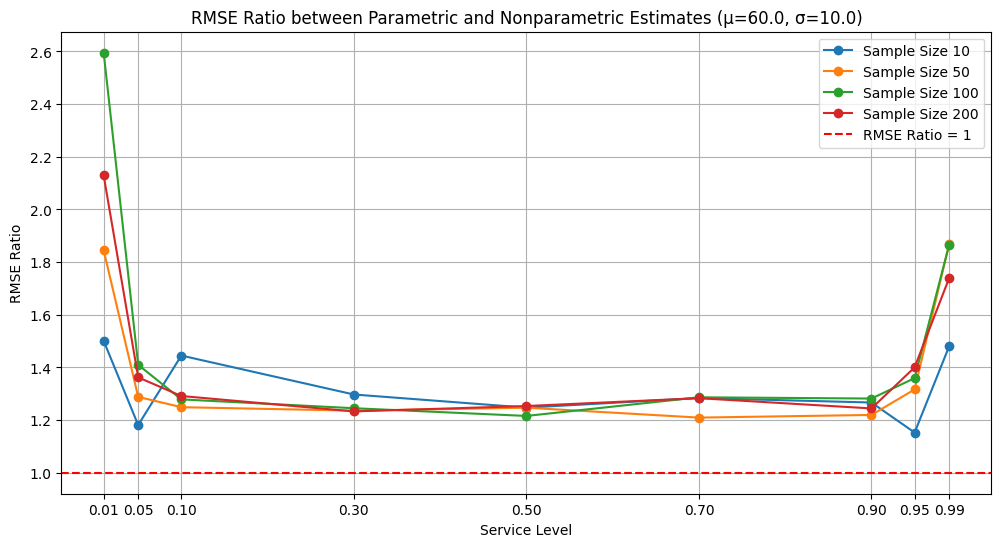

Saved parametric results to D:\Task3Output/parametric_stats_mu_60.0_sigma_10.0.csv
Saved nonparametric results to D:\Task3Output/nonparametric_stats_mu_60.0_sigma_10.0.csv
Saved ratio results to D:\Task3Output/ratio_stats_mu_60.0_sigma_10.0.csv


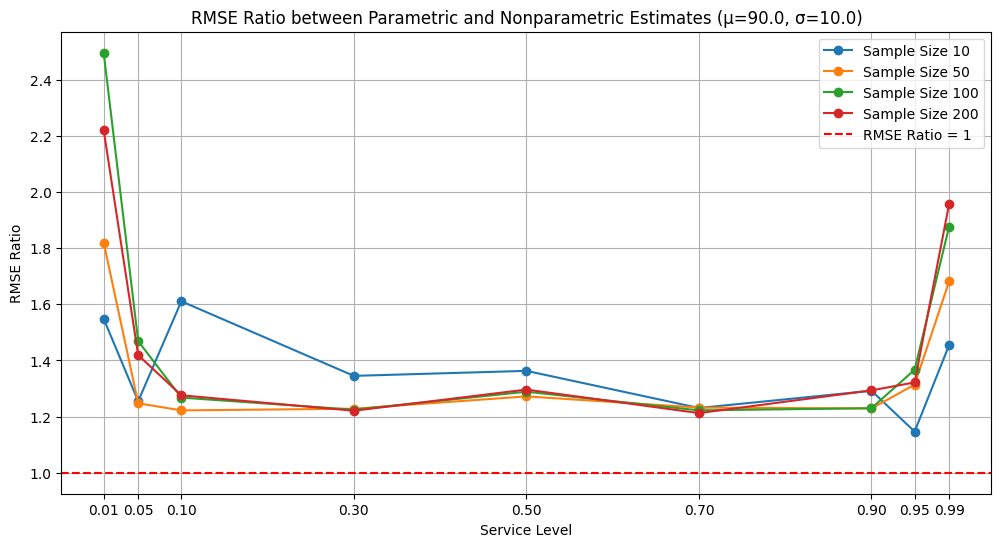

Saved parametric results to D:\Task3Output/parametric_stats_mu_90.0_sigma_10.0.csv
Saved nonparametric results to D:\Task3Output/nonparametric_stats_mu_90.0_sigma_10.0.csv
Saved ratio results to D:\Task3Output/ratio_stats_mu_90.0_sigma_10.0.csv


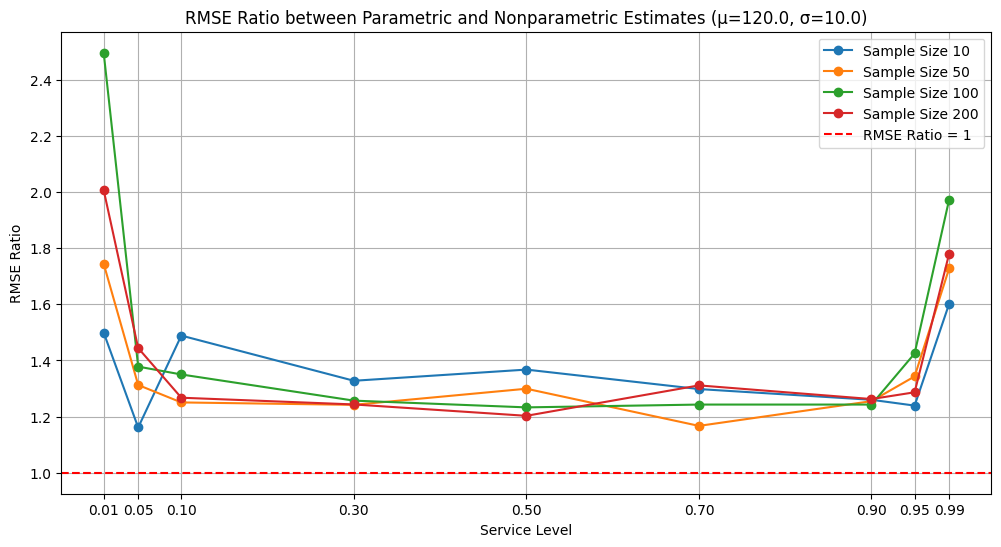

Saved parametric results to D:\Task3Output/parametric_stats_mu_120.0_sigma_10.0.csv
Saved nonparametric results to D:\Task3Output/nonparametric_stats_mu_120.0_sigma_10.0.csv
Saved ratio results to D:\Task3Output/ratio_stats_mu_120.0_sigma_10.0.csv


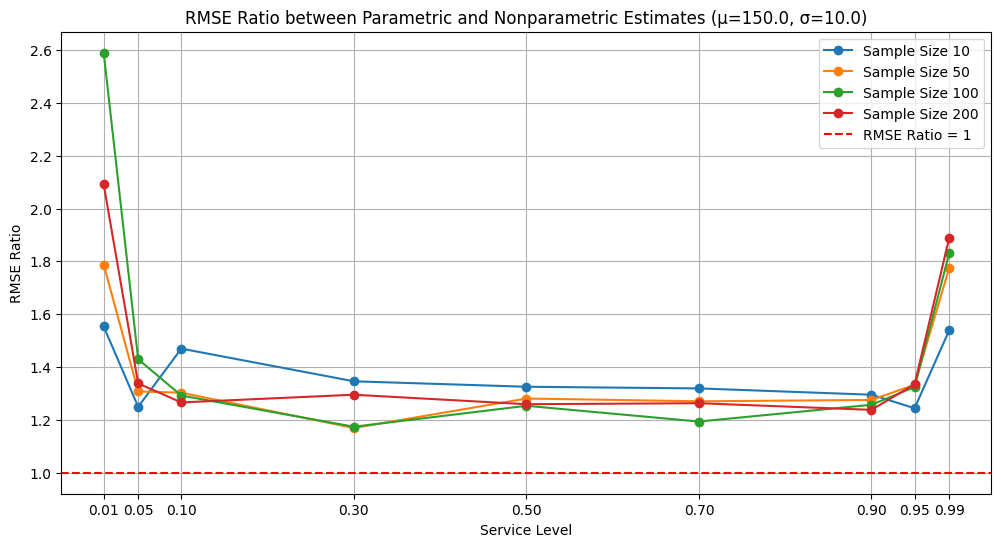

Saved parametric results to D:\Task3Output/parametric_stats_mu_150.0_sigma_10.0.csv
Saved nonparametric results to D:\Task3Output/nonparametric_stats_mu_150.0_sigma_10.0.csv
Saved ratio results to D:\Task3Output/ratio_stats_mu_150.0_sigma_10.0.csv


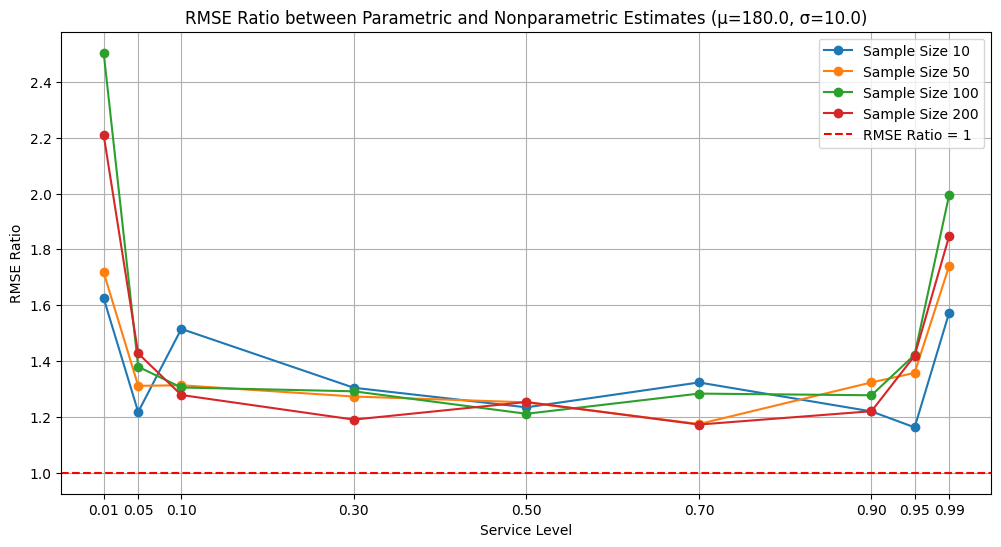

Saved parametric results to D:\Task3Output/parametric_stats_mu_180.0_sigma_10.0.csv
Saved nonparametric results to D:\Task3Output/nonparametric_stats_mu_180.0_sigma_10.0.csv
Saved ratio results to D:\Task3Output/ratio_stats_mu_180.0_sigma_10.0.csv


In [ ]:
import os
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd



def monte_carlo_simulation(distribution, params, sample_sizes, service_levels, M):
    results = []

    for n in sample_sizes:
        for tau in service_levels:
            true_q, parametric_qs, nonparametric_qs = simulate(n, M, tau, distribution, params)
            metrics = calculate_metrics(true_q, parametric_qs, nonparametric_qs, M)
            metrics.update({'n': n, 'tau': tau})
            results.append(metrics)
    return results


def simulate(n, M, tau, distribution, params):
    true_q = true_quantile(tau, distribution, params)
    parametric_qs = []
    nonparametric_qs = []

    for _ in range(M):
        if distribution == 'normal':
            sample = np.random.normal(loc=params['mu'], scale=params['sigma'], size=n)
        elif distribution == 'lognormal':
            sample = np.random.lognormal(mean=params['mu'], sigma=params['sigma'], size=n)

        parametric_qs.append(parametric_estimator(tau, distribution, sample))
        nonparametric_qs.append(nonparametric_estimator(tau, sample))

    return true_q, np.array(parametric_qs), np.array(nonparametric_qs)


def true_quantile(tau, distribution, params):
    if distribution == 'normal':
        return sts.norm.ppf(tau, loc=params['mu'], scale=params['sigma'])
    elif distribution == 'lognormal':
        return sts.lognorm.ppf(tau, s=params['sigma'], scale=np.exp(params['mu']))

def parametric_estimator(tau, distribution, sample):
    if distribution == 'normal':
        mu_hat, sigma_hat = np.mean(sample), np.std(sample, ddof=1)
        return sts.norm.ppf(tau, loc=mu_hat, scale=sigma_hat)
    elif distribution == 'lognormal':
        log_sample = np.log(sample)
        mu_hat, sigma_hat = np.mean(log_sample), np.std(log_sample, ddof=1)
        return sts.lognorm.ppf(tau, s=sigma_hat, scale=np.exp(mu_hat))

def nonparametric_estimator(tau, sample):
    n = len(sample)
    sorted_sample = np.sort(sample)
    return sorted_sample[int(np.ceil(tau * n)) - 1]


def calculate_metrics(true_q, parametric_qs, nonparametric_qs, M):
    rmse_parametric = np.sqrt(np.mean((parametric_qs - true_q) ** 2))
    rmse_nonparametric = np.sqrt(np.mean((nonparametric_qs - true_q) ** 2))
    rmse_ratio = rmse_nonparametric / rmse_parametric

    sl_parametric = np.mean(parametric_qs >= true_q)
    sl_nonparametric = np.mean(nonparametric_qs >= true_q)

    plr_parametric = np.mean(np.abs((parametric_qs - true_q) / true_q))
    plr_nonparametric = np.mean(np.abs((nonparametric_qs - true_q) / true_q))
    plr_ratio = plr_nonparametric / plr_parametric

    return {
        'RMSE Parametric': rmse_parametric,
        'RMSE Nonparametric': rmse_nonparametric,
        'RMSE Ratio': rmse_ratio,
        'Service Level Parametric': sl_parametric,
        'Service Level Nonparametric': sl_nonparametric,
        'Profit Loss Ratio Parametric': plr_parametric,
        'Profit Loss Ratio Nonparametric': plr_nonparametric,
        'Profit Loss Ratio': plr_ratio
    }

def create_ratio_table(results):
    data = {
        'Sample Size': [],
        'Service Level': [],
        'Ratio': []
    }

    for result in results:
        data['Sample Size'].append(result['n'])
        data['Service Level'].append(result['tau'])
        data['Ratio'].append(result['Profit Loss Ratio'])

    return pd.DataFrame(data)

def create_statistics_table(results, estimator_type):
    data = {
        'Sample Size': [],
        'Service Level': [],
        'RMSE': [],
        'SL': [],
        'PLR': []
    }

    for result in results:
        data['Sample Size'].append(result['n'])
        data['Service Level'].append(result['tau'])
        data['RMSE'].append(result[f'RMSE {estimator_type}'])
        data['SL'].append(result[f'Service Level {estimator_type}'])
        data['PLR'].append(result[f'Profit Loss Ratio {estimator_type}'])

    return pd.DataFrame(data)


def plot_rmse_ratio_comparison(results, service_levels, mu, sigma):
    rmse_ratios = {}

    for result in results:
        n = result['n']
        tau = result['tau']
        if n not in rmse_ratios:
            rmse_ratios[n] = {tau: [] for tau in service_levels}
        rmse_ratios[n][tau].append(result['RMSE Ratio'])

    plt.figure(figsize=(12, 6))

    for n in rmse_ratios:
        avg_rmse_ratios = [np.mean(rmse_ratios[n][tau]) for tau in service_levels]
        plt.plot(service_levels, avg_rmse_ratios, marker='o', label=f'Sample Size {n}')

    plt.axhline(y=1, color='r', linestyle='--', label='RMSE Ratio = 1')
    plt.title(f'RMSE Ratio between Parametric and Nonparametric Estimates (μ={mu}, σ={sigma})')
    plt.xlabel('Service Level')
    plt.ylabel('RMSE Ratio')
    plt.xticks(service_levels)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_plr_ratio_comparison(results, service_levels, mu, sigma):
    plr_ratios = {}

    for result in results:
        n = result['n']
        tau = result['tau']
        if n not in plr_ratios:
            plr_ratios[n] = {tau: [] for tau in service_levels}
        plr_ratios[n][tau].append(result['Profit Loss Ratio'])

    plt.figure(figsize=(12, 6))

    for n in plr_ratios:
        avg_plr_ratios = [np.mean(plr_ratios[n][tau]) for tau in service_levels]
        plt.plot(service_levels, avg_plr_ratios, marker='o', label=f'Sample Size {n}')

    plt.axhline(y=1, color='r', linestyle='--', label='PLR Ratio = 1')
    plt.title(f'PLR Ratio between Parametric and Nonparametric Estimates (μ={mu}, σ={sigma})')
    plt.xlabel('Service Level')
    plt.ylabel('PLR Ratio')
    plt.xticks(service_levels)
    plt.legend()
    plt.grid(True)
    plt.show()

def initialize_mu_sigma(mu_start, mu_end, mu_steps, sigma_start, sigma_end, sigma_steps):
    mu_range = np.linspace(mu_start, mu_end, mu_steps)
    sigma_range = np.linspace(sigma_start, sigma_end, sigma_steps)
    return mu_range, sigma_range

def save_simulation_results(results, mu, sigma, output_folder):
    df_parametric = create_statistics_table(results, 'Parametric')
    df_nonparametric = create_statistics_table(results, 'Nonparametric')
    df_ratio = create_ratio_table(results)

    parametric_filename = os.path.join(output_folder, f'parametric_stats_mu_{mu}_sigma_{sigma}.csv')
    nonparametric_filename = os.path.join(output_folder, f'nonparametric_stats_mu_{mu}_sigma_{sigma}.csv')
    ratio_filename = os.path.join(output_folder, f'ratio_stats_mu_{mu}_sigma_{sigma}.csv')

    df_parametric.to_csv(parametric_filename, index=False)
    df_nonparametric.to_csv(nonparametric_filename, index=False)
    df_ratio.to_csv(ratio_filename, index=False)

    print(f"Saved parametric results to {parametric_filename}")
    print(f"Saved nonparametric results to {nonparametric_filename}")
    print(f"Saved ratio results to {ratio_filename}")

def main_for_normal_range_in_mu_and_sigma():
    mu_range, sigma_range = initialize_mu_sigma(60, 180, 5, 10, 10, 1)
    sample_sizes = [10, 50, 100, 200]
    service_levels = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]
    M = 500
    output_folder = 'D:\\Task3Output'
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for mu in mu_range:
        for sigma in sigma_range:
            params = {'mu': mu, 'sigma': sigma}
            results_normal = monte_carlo_simulation('normal', params, sample_sizes, service_levels, M)


            plot_rmse_ratio_comparison(results_normal, service_levels, mu, sigma)


            save_simulation_results(results_normal, mu, sigma, output_folder)

def main_for_lognormal_range_in_mu_and_sigma():
    mu_range, sigma_range = initialize_mu_sigma(2, 15, 5, 0.6, 0.6, 1)
    sample_sizes = [10, 50, 100, 200]
    service_levels = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]
    M = 500
    output_folder = 'D:\\Task3Output'
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for mu in mu_range:
        for sigma in sigma_range:
            params = {'mu': mu, 'sigma': sigma}
            results_lognormal = monte_carlo_simulation('lognormal', params, sample_sizes, service_levels, M)


            plot_rmse_ratio_comparison(results_lognormal, service_levels, mu, sigma)

            save_simulation_results(results_lognormal, mu, sigma, output_folder)

main_for_normal_range_in_mu_and_sigma()




In [ ]:
#TASK3 SL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

np.random.seed(42)

def initialize_mu_sigma(mu_start, mu_end, mu_step, sigma_start, sigma_end, sigma_step):
    mu_values = np.arange(mu_start, mu_end, mu_step)
    sigma_values = np.arange(sigma_start, sigma_end, sigma_step)
    return mu_values, sigma_values

def parametric_estimator(tau, distribution, sample):
    if distribution == 'normal':
        mu_hat, sigma_hat = np.mean(sample), np.std(sample, ddof=1)
        return sts.norm.ppf(tau, loc=mu_hat, scale=sigma_hat)
    elif distribution == 'lognormal':
        log_sample = np.log(sample)
        mu_hat, sigma_hat = np.mean(log_sample), np.std(log_sample, ddof=1)
        return sts.lognorm.ppf(tau, s=sigma_hat, scale=np.exp(mu_hat))

def nonparametric_estimator(tau, sample):
    n = len(sample)
    sorted_sample = np.sort(sample)
    return sorted_sample[int(np.ceil(tau * n)) - 1]

def empirical_service_level(estimated_quantile, sample):
    return np.mean(sample <= estimated_quantile)

def main_for_normal_range_in_mu_and_sigma():
    mu_range, sigma_range = initialize_mu_sigma(115, 116, 1, 10, 11, 1)
    sample_sizes = [10, 50, 100, 200]
    service_levels = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]
    M = 500

    results = {
        'normal': {'parametric': {n: [] for n in sample_sizes},
                   'nonparametric': {n: [] for n in sample_sizes}},
    }

    for mu in mu_range:
        for sigma in sigma_range:
            for n in sample_sizes:
                parametric_results = []
                nonparametric_results = []
                for tau in service_levels:
                    empirical_service_levels_parametric = []
                    empirical_service_levels_nonparametric = []
                    for _ in range(M):
                        samples_normal = np.random.normal(loc=mu, scale=sigma, size=n)
                        parametric_quantile_normal = parametric_estimator(tau, 'normal', samples_normal)
                        nonparametric_quantile_normal = nonparametric_estimator(tau, samples_normal)
                        empirical_service_levels_parametric.append(empirical_service_level(parametric_quantile_normal, samples_normal))
                        empirical_service_levels_nonparametric.append(empirical_service_level(nonparametric_quantile_normal, samples_normal))

                    avg_service_level_parametric = np.mean(empirical_service_levels_parametric)
                    avg_service_level_nonparametric = np.mean(empirical_service_levels_nonparametric)

                    parametric_results.append(avg_service_level_parametric)
                    nonparametric_results.append(avg_service_level_nonparametric)

                results['normal']['parametric'][n] = parametric_results
                results['normal']['nonparametric'][n] = nonparametric_results

    plot_service_levels(results, 'normal', sample_sizes, service_levels, "Empirical Service Levels for Normal Distribution")

def main_for_lognormal_range_in_mu_and_sigma():
    mu_range, sigma_range = initialize_mu_sigma(6, 7, 1, 0.6, 0.7, 1)
    sample_sizes = [10, 50, 100, 200]
    service_levels = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]
    M = 500

    results = {
        'lognormal': {'parametric': {n: [] for n in sample_sizes},
                      'nonparametric': {n: [] for n in sample_sizes}},
    }

    for mu in mu_range:
        for sigma in sigma_range:
            for n in sample_sizes:
                parametric_results = []
                nonparametric_results = []
                for tau in service_levels:
                    empirical_service_levels_parametric = []
                    empirical_service_levels_nonparametric = []
                    for _ in range(M):
                        samples_lognormal = np.random.lognormal(mean=mu, sigma=sigma, size=n)
                        parametric_quantile_lognormal = parametric_estimator(tau, 'lognormal', samples_lognormal)
                        nonparametric_quantile_lognormal = nonparametric_estimator(tau, samples_lognormal)
                        empirical_service_levels_parametric.append(empirical_service_level(parametric_quantile_lognormal, samples_lognormal))
                        empirical_service_levels_nonparametric.append(empirical_service_level(nonparametric_quantile_lognormal, samples_lognormal))

                    avg_service_level_parametric = np.mean(empirical_service_levels_parametric)
                    avg_service_level_nonparametric = np.mean(empirical_service_levels_nonparametric)

                    parametric_results.append(avg_service_level_parametric)
                    nonparametric_results.append(avg_service_level_nonparametric)

                results['lognormal']['parametric'][n] = parametric_results
                results['lognormal']['nonparametric'][n] = nonparametric_results

    plot_service_levels(results, 'lognormal', sample_sizes, service_levels, "Empirical Service Levels for Lognormal Distribution")

def plot_service_levels(results, distribution, sample_sizes, service_levels, title):
    plt.figure(figsize=(12, 8))
    for n in sample_sizes:
        x = service_levels
        y_parametric = results[distribution]['parametric'][n]
        y_nonparametric = results[distribution]['nonparametric'][n]
        if len(y_parametric) == len(x) and len(y_nonparametric) == len(x):
            plt.plot(x, y_parametric, marker='o', linestyle='-', label=f'Parametric n={n}')
            plt.plot(x, y_nonparametric, marker='x', linestyle='--', label=f'Nonparametric n={n}')
        else:
            print(f"Skipping plot for sample size {n} due to mismatched lengths.")
    plt.xlabel('Target Service Level (τ)')
    plt.ylabel('Empirical Service Level')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

main_for_normal_range_in_mu_and_sigma()
main_for_lognormal_range_in_mu_and_sigma()

#TASK4

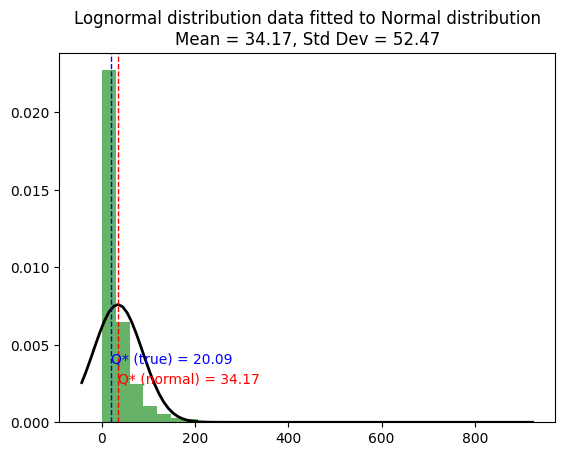

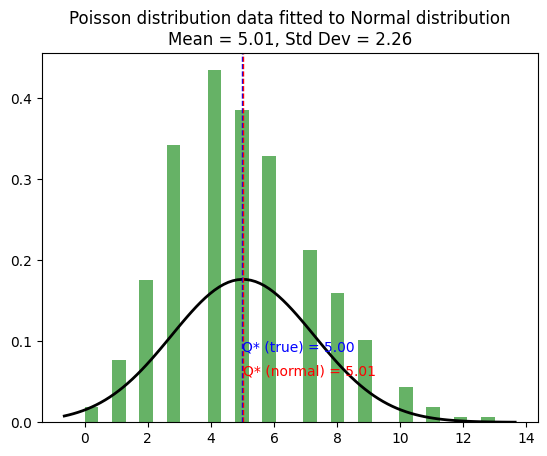

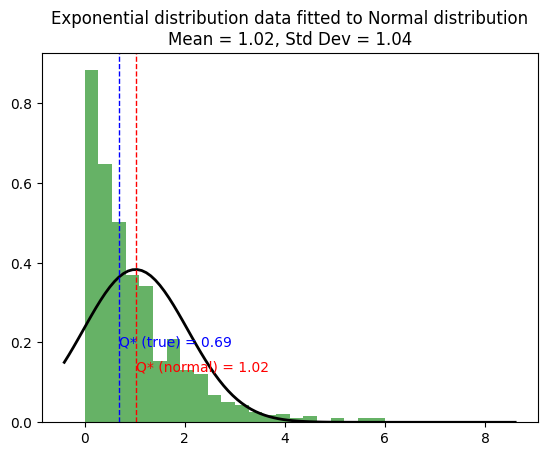

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the number of samples to simulate
num_samples = 1000

# Define parameters
p = 5
c = 2.5
tau = (p - c) / p

def plot_distribution(samples, dist, title):
    mean = np.mean(samples)
    std_dev = np.std(samples)

    # Calculate the optimal order quantity
    optimal_order_qty_dist = dist.ppf(tau)
    normal_dist = stats.norm(loc=mean, scale=std_dev)
    optimal_order_qty_norm = normal_dist.ppf(tau)

    # Plot the histogram of the sample data
    plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

    # Plot the fitted normal distribution curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = normal_dist.pdf(x)
    plt.plot(x, p, 'k', linewidth=2)

    # Annotate the optimal order quantity (both true distribution and normal distribution)
    plt.axvline(optimal_order_qty_dist, color='b', linestyle='dashed', linewidth=1)
    plt.text(optimal_order_qty_dist, max(p)/2, f'Q* (true) = {optimal_order_qty_dist:.2f}', color='b')
    plt.axvline(optimal_order_qty_norm, color='r', linestyle='dashed', linewidth=1)
    plt.text(optimal_order_qty_norm, max(p)/3, f'Q* (normal) = {optimal_order_qty_norm:.2f}', color='r')

    plt.title(f"{title}\nMean = {mean:.2f}, Std Dev = {std_dev:.2f}")
    plt.show()

# Lognormal distribution
mu_log, sigma_log = 3, 1
samples_log = np.random.lognormal(mean=mu_log, sigma=sigma_log, size=num_samples)
lognorm_dist = stats.lognorm(s=sigma_log, scale=np.exp(mu_log))
plot_distribution(samples_log, lognorm_dist, "Lognormal distribution data fitted to Normal distribution")

# Poisson distribution
lam = 5
samples_pois = np.random.poisson(lam=lam, size=num_samples)
poisson_dist = stats.poisson(mu=lam)
plot_distribution(samples_pois, poisson_dist, "Poisson distribution data fitted to Normal distribution")

# Exponential distribution
scale_exp = 1.0
samples_exp = np.random.exponential(scale=scale_exp, size=num_samples)
expon_dist = stats.expon(scale=scale_exp)
plot_distribution(samples_exp, expon_dist, "Exponential distribution data fitted to Normal distribution")

# ***Task 5***

Descriptive Statistics:
        main street A  main street B  station A  station B
count        2941.00         486.00    2110.00     694.00
mean           67.63          99.09     117.24     113.92
std            41.67          43.48      52.78      40.83
min             1.02          18.89       4.94      35.78
25%            42.66          43.46      75.77      88.72
50%            58.47         117.16     124.76     106.13
75%            93.87         131.64     156.29     127.24
max           191.88         190.17     268.02     291.96


Sample Mean, Sample Variance, and the Numbers of Observations:
           main street A  main street B  station A  station B
mean            67.6300        99.0900   117.2400   113.9200
variance      1736.3889      1890.5104  2785.7284  1667.0889
count         2941.0000       486.0000  2110.0000   694.0000


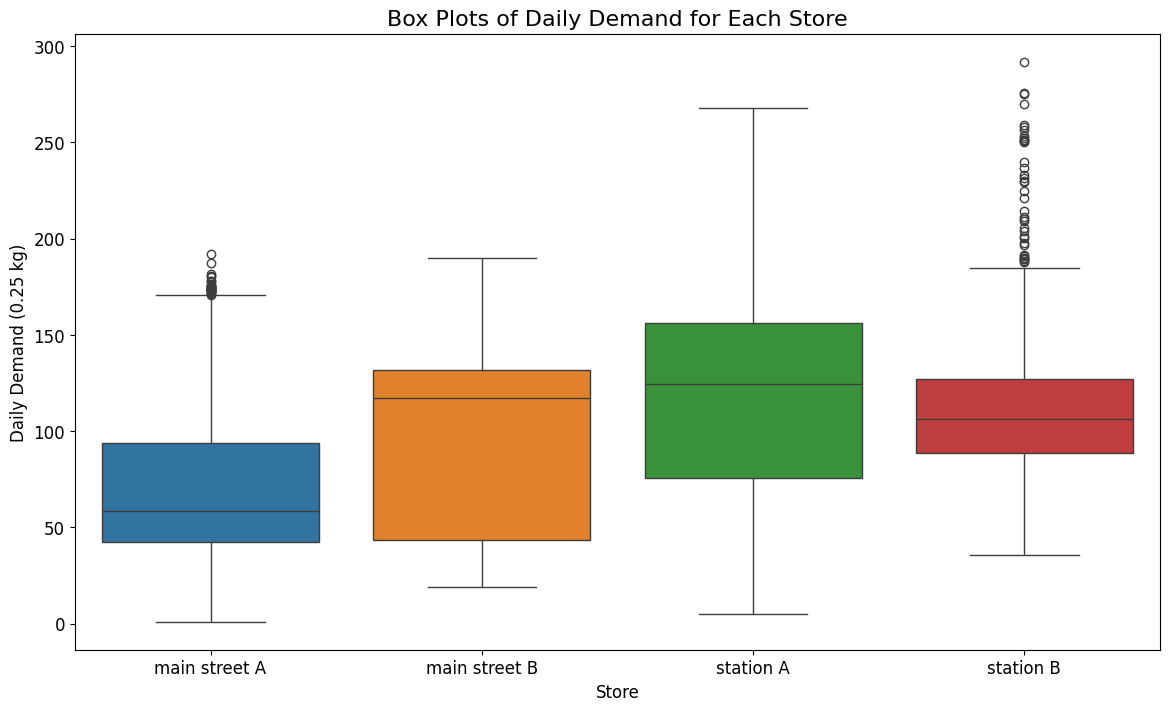

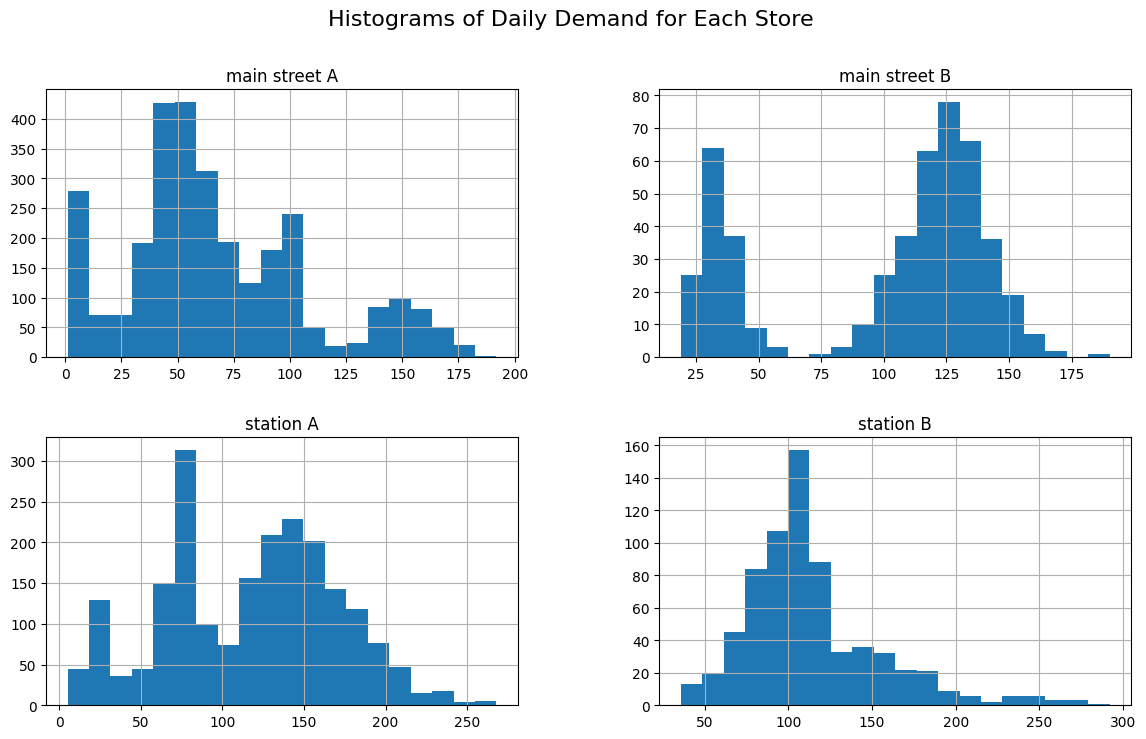

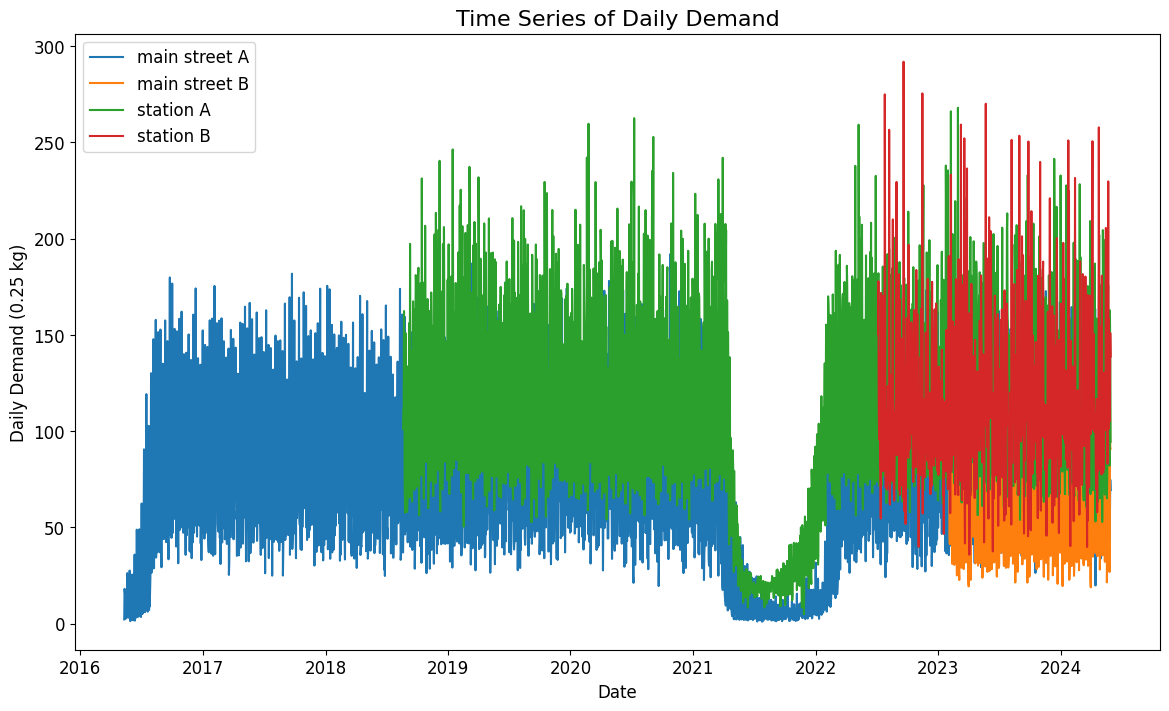

main street A - Weekend Mean: 92.53, Overall Mean: 67.63
main street B - Weekend Mean: 34.05, Overall Mean: 99.09
station A - Weekend Mean: 67.74, Overall Mean: 117.24
station B - Weekend Mean: 104.78, Overall Mean: 113.92


<Figure size 1400x800 with 0 Axes>

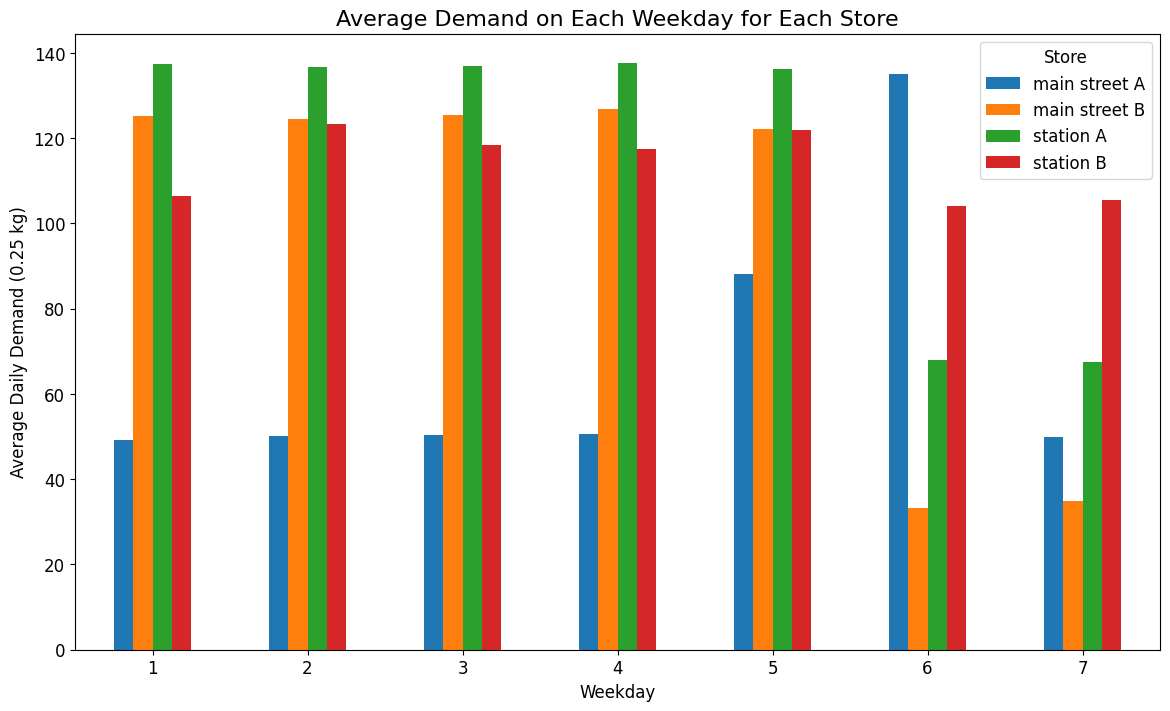

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    # Load the data from the Excel file
    file_path = '/content/BakeryData2024_Vilnius.xlsx'
    bakery_data = pd.read_excel(file_path)
    bakery_data['date'] = pd.to_datetime(bakery_data['date'])

    # Add 'weekday' column to indicate the day of the week
    bakery_data['weekday'] = bakery_data['date'].dt.dayofweek + 1  # Monday=1, Sunday=7

    # Calculate descriptive statistics (excluding 'date' and 'weekday' columns)
    descriptive_stats = bakery_data.drop(columns=['date', 'weekday']).describe()
    descriptive_stats.loc['count'] = descriptive_stats.loc['count'].astype(int)
    descriptive_stats = descriptive_stats.round(2)  # Round to two decimal places
    print("Descriptive Statistics:\n", descriptive_stats)
    print("\n")

    # Extract sample mean, sample variance, and the number of observations. For question A
    summary_stats = descriptive_stats.loc[['mean', 'std', 'count']]
    summary_stats.rename(index={'std': 'variance'}, inplace=True)
    summary_stats.loc['variance'] = summary_stats.loc['variance'] ** 2
    print("Sample Mean, Sample Variance, and the Numbers of Observations:\n", summary_stats)

    # Create box plots (excluding 'date' and 'weekday' columns)
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=bakery_data.drop(columns=['date', 'weekday']))
    plt.title('Box Plots of Daily Demand for Each Store', fontsize=16)
    plt.ylabel('Daily Demand (0.25 kg)', fontsize=12)
    plt.xlabel('Store', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Create histograms (excluding 'date' and 'weekday' columns)
    bakery_data.drop(columns=['date', 'weekday']).hist(bins=20, figsize=(14, 8), layout=(2, 2))
    plt.suptitle('Histograms of Daily Demand for Each Store', fontsize=16)
    plt.show()

    # Create time series plots
    plt.figure(figsize=(14, 8))
    for store in ['main street A', 'main street B', 'station A', 'station B']:
        plt.plot(bakery_data['date'], bakery_data[store], label=store)
    plt.title('Time Series of Daily Demand', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Daily Demand (0.25 kg)', fontsize=12)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Analyze weekend patterns
    weekend_data = bakery_data[bakery_data['weekday'] >= 6]  # Select data for Saturday and Sunday
    for store in ['main street A', 'main street B', 'station A', 'station B']:
        weekend_mean = weekend_data[store].mean()
        overall_mean = bakery_data[store].mean()
        print(f"{store} - Weekend Mean: {weekend_mean:.2f}, Overall Mean: {overall_mean:.2f}")

    # Calculate average demand for each weekday for each store (excluding 'date' column)
    weekday_avg_demand = bakery_data.drop(columns=['date']).groupby('weekday').mean()

    # Plot average demand for each weekday for each store
    plt.figure(figsize=(14, 8))
    weekday_avg_demand.plot(kind='bar', figsize=(14, 8))
    plt.title('Average Demand on Each Weekday for Each Store', fontsize=16)
    plt.xlabel('Weekday', fontsize=12)
    plt.ylabel('Average Daily Demand (0.25 kg)', fontsize=12)
    plt.xticks(fontsize=12, rotation=0)
    plt.yticks(fontsize=12)
    plt.legend(title='Store', fontsize=12, title_fontsize=12)
    plt.show()

if __name__ == '__main__':
    main()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

*italicized text*






# **TASK6**

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as sts

# Parametric approach
def mean_and_variance_normal(vY):
    return np.mean(vY), np.var(vY)

def mean_and_variance_lognormal(vY):
    vY = np.log(vY)
    mu_hat = np.mean(vY)
    sigma2_hat = np.var(vY)
    return mu_hat, sigma2_hat

def array_weekend_days(df):
    mask_friday = df[df['weekday'] == 5].index
    mask_saturday = df[df['weekday'] == 6].index
    mask_sunday = df[df['weekday'] == 7].index

    df_select_friday = df.loc[mask_friday]
    df_select_saturday = df.loc[mask_saturday]
    df_select_sunday = df.loc[mask_sunday]

    v_street_a_weekend_friday = np.array(df_select_friday['main street A'].dropna())
    v_street_a_weekend_saturday = np.array(df_select_saturday['main street A'].dropna())
    v_street_a_weekend_sunday = np.array(df_select_sunday['main street A'].dropna())
    v_station_b_weekend_friday = np.array(df_select_friday['station B'].dropna())
    v_station_b_weekend_saturday = np.array(df_select_saturday['station B'].dropna())
    v_station_b_weekend_sunday = np.array(df_select_sunday['station B'].dropna())

    return (v_street_a_weekend_friday, v_street_a_weekend_saturday, v_street_a_weekend_sunday,
            v_station_b_weekend_friday, v_station_b_weekend_saturday, v_station_b_weekend_sunday)

def normal_optimal_order_quantity(mu_hat, sigma2_hat, tau):
    Qstar = sts.norm.ppf(tau, mu_hat, np.sqrt(sigma2_hat))
    return Qstar

def lognormal_optimal_order_quantity(mu_hat, sigma2_hat, tau):
    Qstar = sts.lognorm.ppf(tau, np.sqrt(sigma2_hat), scale=np.exp(mu_hat))
    return Qstar

def interval_normal(vY, tau, mu_hat, sigma2_hat, alpha, store_name):
    Qstar = normal_optimal_order_quantity(mu_hat, sigma2_hat, tau)

    z = sts.norm.ppf(1 - alpha / 2, loc=0, scale=1)
    asymptotic_variance = sigma2_hat + 0.5 * ((Qstar - mu_hat) ** 2)
    n = len(vY)
    lower_bound = Qstar - z * np.sqrt(asymptotic_variance / n)
    upper_bound = Qstar + z * np.sqrt(asymptotic_variance / n)

    print(f"The 95% confidence interval of {store_name} is: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print('')

def interval_lognormal(vY, tau, mu_hat, sigma2_hat, alpha, store_name):
    Qstar = lognormal_optimal_order_quantity(mu_hat, sigma2_hat, tau)

    z = sts.norm.ppf(1 - alpha / 2, loc=0, scale=1)
    asymptotic_variance = (Qstar ** 2) * (sigma2_hat + 0.5 * (np.log(Qstar) - mu_hat) ** 2)
    n = len(vY)
    lower_bound = Qstar - z * np.sqrt((asymptotic_variance / n))
    upper_bound = Qstar + z * np.sqrt((asymptotic_variance / n))

    print(f"The 95% confidence interval of {store_name} is: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print('')

def calculate_optimal_order_quantity_and_interval(alpha, v_weekend_day, store_name, is_log_transformed):
    p = 4.64
    c = 3.85 if 'A' in store_name else 3.32
    cs = 0.11 if 'A' in store_name else 0.09
    pl = 0.15
    tau = (p + pl - c - cs) / (p + pl)

    if is_log_transformed:
        mu_hat, sigma2_hat = mean_and_variance_lognormal(v_weekend_day)
        print(f'The point estimate of {store_name} is:', format(lognormal_optimal_order_quantity(mu_hat, sigma2_hat, tau), ".2f"))
        interval_lognormal(v_weekend_day, tau, mu_hat, sigma2_hat, alpha, store_name)
    else:
        mu_hat, sigma2_hat = mean_and_variance_normal(v_weekend_day)
        print(f'The point estimate of {store_name} is:', format(normal_optimal_order_quantity(mu_hat, sigma2_hat, tau), ".2f"))
        interval_normal(v_weekend_day, tau, mu_hat, sigma2_hat, alpha, store_name)

def jarque_bera_test(alpha, vY, string_name):
    jb_normal = sts.jarque_bera(vY)
    jb_lognormal = sts.jarque_bera(np.log(vY))

    print(string_name)
    print('Jarque-Bera test for normality:')
    print('statistic:', jb_normal[0])
    print('p-value:  ', jb_normal[1])
    if jb_normal[1] < alpha:
        print('p-value < alpha, JB test rejects normality')
    else:
        print('p-value >= alpha, JB test fails to reject normality')

    print('Jarque-Bera test for lognormality:')
    print('statistic:', jb_lognormal[0])
    print('p-value:  ', jb_lognormal[1])
    if jb_lognormal[1] < alpha:
        print('p-value < alpha, JB test rejects lognormality')
    else:
        print('p-value >= alpha, JB test fails to reject lognormality')

    return jb_normal[1] >= alpha, jb_lognormal[1] >= alpha

# Nonparametric approach
def nonparametric_optimal_order_quantity(vY, tau):
    vY = np.sort(vY)
    idx = int(np.ceil(tau * len(vY)) - 1)
    Qstar_nonparametric = vY[idx]
    return Qstar_nonparametric

def interval_nonparametric(vY, tau, alpha, store_name):
    z = sts.norm.ppf(1 - alpha / 2, loc=0, scale=1)
    n = len(vY)

    lower_bound_index = int(np.ceil(n * tau - z * np.sqrt(n * tau * (1 - tau))) - 1)
    upper_bound_index = int(np.ceil(n * tau + z * np.sqrt(n * tau * (1 - tau))) - 1)

    vY_sorted = np.sort(vY)

    lower_bound = vY_sorted[max(0, lower_bound_index)]
    upper_bound = vY_sorted[min(n - 1, upper_bound_index)]

    print(f"The 95% confidence interval of {store_name} is: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print('')

def calculate_optimal_order_quantity_and_interval_store_a_nonparametric(alpha, v_street_a_weekend_friday, v_street_a_weekend_saturday, v_street_a_weekend_sunday):
    p = 4.64
    c = 3.85
    cs = 0.11
    pl = 0.15
    tau = (p + pl - c - cs) / (p + pl)

    print('The point estimate of street A on Friday is:', nonparametric_optimal_order_quantity(v_street_a_weekend_friday, tau))
    interval_nonparametric(v_street_a_weekend_friday, tau, alpha, 'street A on Friday')
    print('The point estimate of street A on Saturday is:', nonparametric_optimal_order_quantity(v_street_a_weekend_saturday, tau))
    interval_nonparametric(v_street_a_weekend_saturday, tau, alpha, 'street A on Saturday')
    print('The point estimate of street A on Sunday is:', nonparametric_optimal_order_quantity(v_street_a_weekend_sunday, tau))
    interval_nonparametric(v_street_a_weekend_sunday, tau, alpha, 'street A on Sunday')

def calculate_optimal_order_quantity_and_interval_station_b_nonparametric(alpha, v_station_b_weekend_friday, v_station_b_weekend_saturday, v_station_b_weekend_sunday):
    p = 4.64
    c = 3.32
    cs = 0.09
    pl = 0.15
    tau = (p + pl - c - cs) / (p + pl)
    print('The point estimate of station B on Friday is:', nonparametric_optimal_order_quantity(v_station_b_weekend_friday, tau))
    interval_nonparametric(v_station_b_weekend_friday, tau, alpha, 'station B on Friday')
    print('The point estimate of station B on Saturday is:', nonparametric_optimal_order_quantity(v_station_b_weekend_saturday, tau))
    interval_nonparametric(v_station_b_weekend_saturday, tau, alpha, 'station B on Saturday')
    print('The point estimate of station B on Sunday is:', nonparametric_optimal_order_quantity(v_station_b_weekend_sunday, tau))
    interval_nonparametric(v_station_b_weekend_sunday, tau, alpha, 'station B on Sunday')

# Load the data from the provided Excel file
file_path = '/content/BakeryData2024_Vilnius (1).xlsx'
# Load the data
df = pd.read_excel(file_path)
df.dropna(how='all', inplace=True)  # Drop any fully empty rows

# Filter the data to only include dates from 31-05-2022 onwards
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'] >= '2022-05-31']

# Prepare data for analysis
alpha = 0.05
(v_street_a_weekend_friday, v_street_a_weekend_saturday, v_street_a_weekend_sunday,
 v_station_b_weekend_friday, v_station_b_weekend_saturday, v_station_b_weekend_sunday) = array_weekend_days(df)

# Perform Jarque-Bera test and decide on the distribution for Main Street A
print("Jarque-Bera Test Results for Main Street A:")
is_normal_friday, is_lognormal_friday = jarque_bera_test(alpha, v_street_a_weekend_friday, 'Main Street A Friday')
is_normal_saturday, is_lognormal_saturday = jarque_bera_test(alpha, v_street_a_weekend_saturday, 'Main Street A Saturday')
is_normal_sunday, is_lognormal_sunday = jarque_bera_test(alpha, v_street_a_weekend_sunday, 'Main Street A Sunday')

print("Parametric estimates and intervals for Main Street A:")
calculate_optimal_order_quantity_and_interval(alpha, v_street_a_weekend_friday, 'Main Street A on Friday', is_lognormal_friday)
calculate_optimal_order_quantity_and_interval(alpha, v_street_a_weekend_saturday, 'Main Street A on Saturday', is_lognormal_saturday)
calculate_optimal_order_quantity_and_interval(alpha, v_street_a_weekend_sunday, 'Main Street A on Sunday', is_lognormal_sunday)

# Perform Jarque-Bera test and decide on the distribution for Station B
print("Jarque-Bera Test Results for Station B:")
is_normal_friday_b, is_lognormal_friday_b = jarque_bera_test(alpha, v_station_b_weekend_friday, 'Station B Friday')
is_normal_saturday_b, is_lognormal_saturday_b = jarque_bera_test(alpha, v_station_b_weekend_saturday, 'Station B Saturday')
is_normal_sunday_b, is_lognormal_sunday_b = jarque_bera_test(alpha, v_station_b_weekend_sunday, 'Station B Sunday')

print("Parametric estimates and intervals for Station B:")
calculate_optimal_order_quantity_and_interval(alpha, v_station_b_weekend_friday, 'Station B on Friday', is_lognormal_friday_b)
calculate_optimal_order_quantity_and_interval(alpha, v_station_b_weekend_saturday, 'Station B on Saturday', is_lognormal_saturday_b)
calculate_optimal_order_quantity_and_interval(alpha, v_station_b_weekend_sunday, 'Station B on Sunday', is_lognormal_sunday_b)

print("Non-parametric estimates and intervals for Main Street A:")
calculate_optimal_order_quantity_and_interval_store_a_nonparametric(alpha, v_street_a_weekend_friday, v_street_a_weekend_saturday, v_street_a_weekend_sunday)

print("Non-parametric estimates and intervals for Station B:")
calculate_optimal_order_quantity_and_interval_station_b_nonparametric(alpha, v_station_b_weekend_friday, v_station_b_weekend_saturday, v_station_b_weekend_sunday)


Jarque-Bera Test Results for Main Street A:
Main Street A Friday
Jarque-Bera test for normality:
statistic: 0.8942685620040137
p-value:   0.6394580354436443
p-value >= alpha, JB test fails to reject normality
Jarque-Bera test for lognormality:
statistic: 1.6573168996809522
p-value:   0.43663466087803116
p-value >= alpha, JB test fails to reject lognormality
Main Street A Saturday
Jarque-Bera test for normality:
statistic: 1.3833565345517251
p-value:   0.5007349963328211
p-value >= alpha, JB test fails to reject normality
Jarque-Bera test for lognormality:
statistic: 1.4714042682000044
p-value:   0.47916890000960044
p-value >= alpha, JB test fails to reject lognormality
Main Street A Sunday
Jarque-Bera test for normality:
statistic: 38.57267271069006
p-value:   4.207755969022633e-09
p-value < alpha, JB test rejects normality
Jarque-Bera test for lognormality:
statistic: 5.6799395183452654
p-value:   0.0584274328316947
p-value >= alpha, JB test fails to reject lognormality
Parametric est

# **Task 7** *italicized text*

For a price increase of 50%, the expected demand drop is approximately 26.6441%
Optimal price increase ratios to maintain current profit levels:
main street A: 21.02%
station B: 18.22%


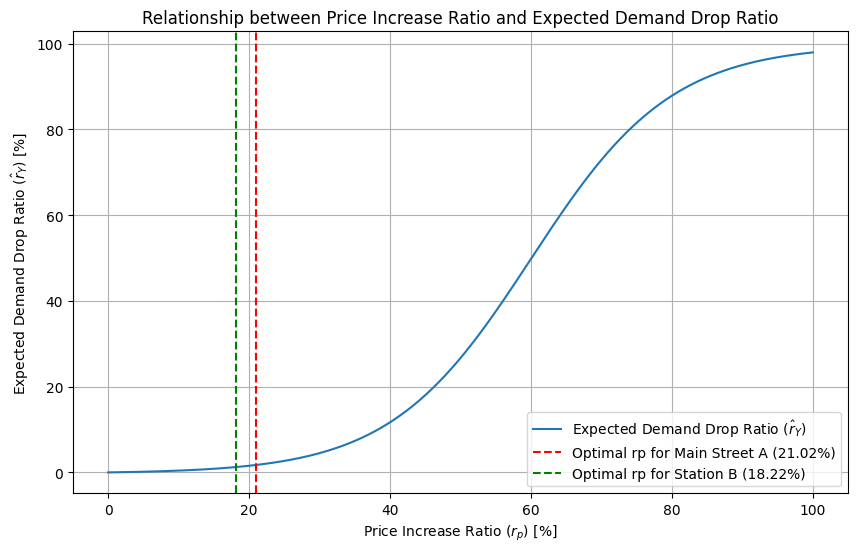

In [ ]:
# Task 7

# function to calculate rY

import numpy as np
import matplotlib.pyplot as plt

def calculate_rY(rp):
    """
    Calculate the expected demand drop ratio (rY) given the price increase ratio (rp).

    Inputs:
    rp: Ratio of price increase (%)

    Return value:
    rY: Expected demand drop ratio (%)
    """
    rY = ((1 + np.exp(6 - rp / 10))**-1 - 0.0025) * 100
    return rY

# Example calculation
rp_example = 50
rY_example = calculate_rY(rp_example)
print(f"For a price increase of {rp_example}%, the expected demand drop is approximately {rY_example:.4f}%")

"""
estimate the current profit and determine the target profit after the cost increase
assume a simple profit model
Profit = (Price−Cost) × Demand
"""

# Define the current and future costs, and the current price
# Current costs and prices for main street A and station B
current_costs = {
    'main street A': 3.85,
    'station B': 3.32,

}

current_prices = {
    'main street A': 4.64,
    'station B': 4.64,

}

# Expected 25% increase in costs
future_costs = {store: cost * 1.25 for store, cost in current_costs.items()}

"""
find the optimal price increase (rp) that maintains
the current profit level after the cost increase
use a numerical approach to find the optimal
rp
"""

# Calculating Optimal Price Increase
def calculate_optimal_price_increase(current_costs, current_prices, future_costs, current_demands):
    """
    Calculate the optimal price increase ratio (rp) to maintain the current profit level after cost increase.

    Inputs:
    current_costs: current costs per store
    current_prices: current prices per store
    future_costs: future costs per store
    current_demands: current demands per store

    Return value:
    optimal_rp: optimal price increase ratio per store
    """
    optimal_rp = {}

    for store in current_costs.keys():
        current_cost = current_costs[store]
        current_price = current_prices[store]
        future_cost = future_costs[store]
        current_demand = current_demands[store]

        current_profit = (current_price - current_cost) * current_demand

        def profit_difference(rp):
            new_price = current_price * (1 + rp / 100)
            rY = calculate_rY(rp)
            new_demand = current_demand * (1 - rY / 100)
            future_profit = (new_price - future_cost) * new_demand
            return future_profit - current_profit

        rp_values = np.linspace(0, 100, 1000)
        profit_diffs = [profit_difference(rp) for rp in rp_values]
        optimal_rp[store] = rp_values[np.argmin(np.abs(profit_diffs))]

    return optimal_rp

# Assume current demands for main street A and station B
current_demands = {
    'main street A': 100,  # Example demand
    'station B': 100  # Example demand

}

optimal_rp = calculate_optimal_price_increase(current_costs, current_prices, future_costs, current_demands)
print("Optimal price increase ratios to maintain current profit levels:")
for store, rp in optimal_rp.items():
    print(f"{store}: {rp:.2f}%")

# Visualizing the Results
def plot_rp_vs_rY():
    rp_values = np.linspace(0, 100, 1000)
    rY_values = [calculate_rY(rp) for rp in rp_values]
    plt.figure(figsize=(10, 6))
    plt.plot(rp_values, rY_values, label="Expected Demand Drop Ratio ($\hat{r}_Y$)")
    plt.axvline(x=21.02, color='r', linestyle='--', label='Optimal rp for Main Street A (21.02%)')
    plt.axvline(x=18.22, color='g', linestyle='--', label='Optimal rp for Station B (18.22%)')
    plt.xlabel("Price Increase Ratio ($r_p$) [%]")
    plt.ylabel("Expected Demand Drop Ratio ($\hat{r}_Y$) [%]")
    plt.title("Relationship between Price Increase Ratio and Expected Demand Drop Ratio")
    plt.grid(True)
    plt.legend()
    plt.show()

plot_rp_vs_rY()



bonus part

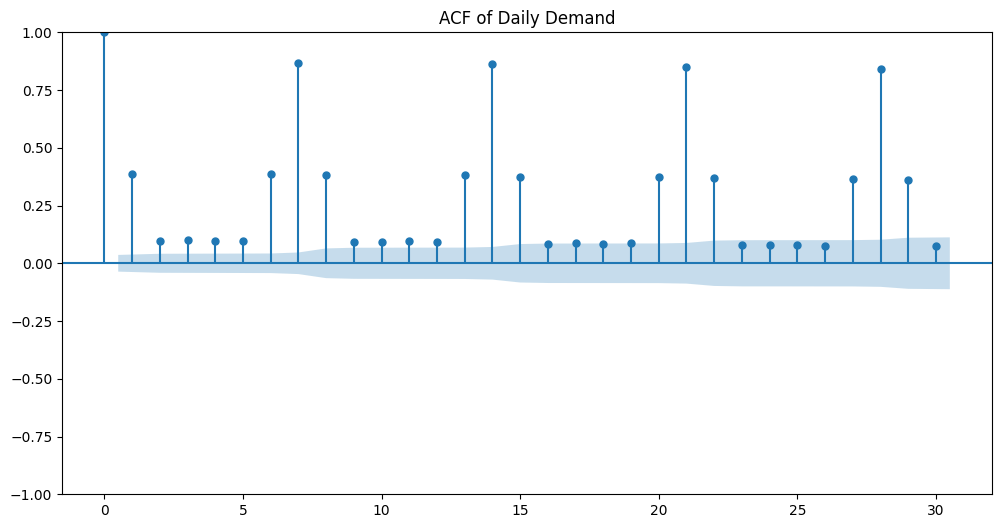

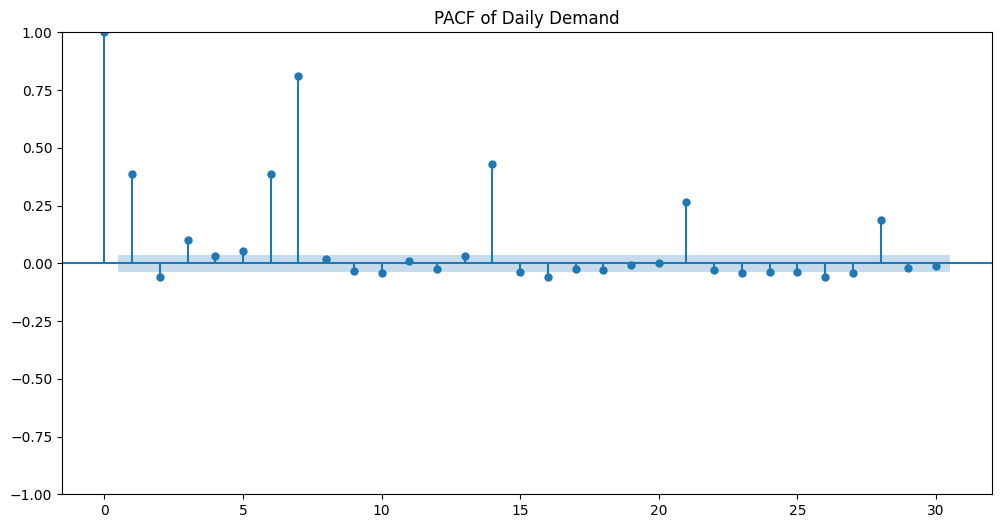

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                     main street A   No. Observations:                 2352
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -9916.572
Date:                           Tue, 25 Jun 2024   AIC                          19843.143
Time:                                   14:51:14   BIC                          19871.941
Sample:                               05-11-2016   HQIC                         19853.633
                                    - 10-18-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0298      0.020      1.458      0.145      -0.010       0.070
ma.L1         -0.9266      0.008   -115.576

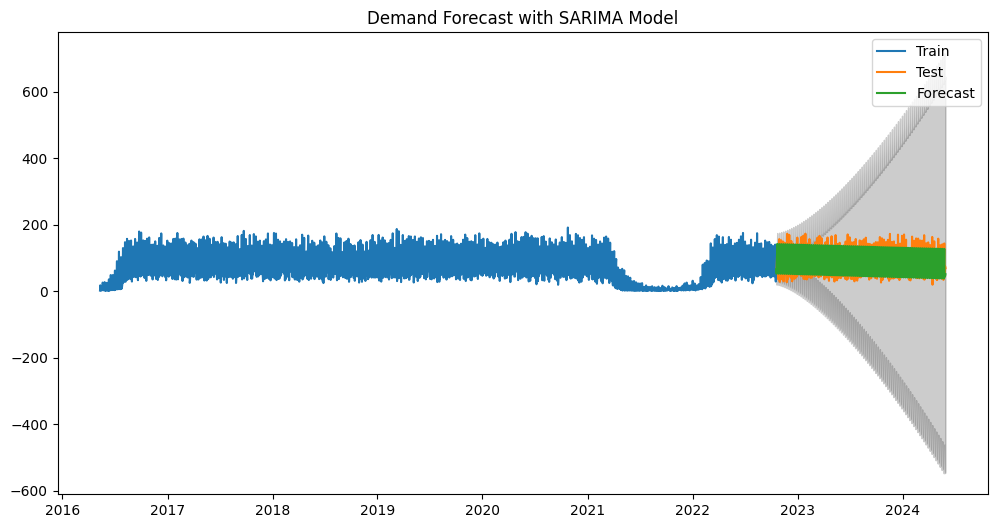

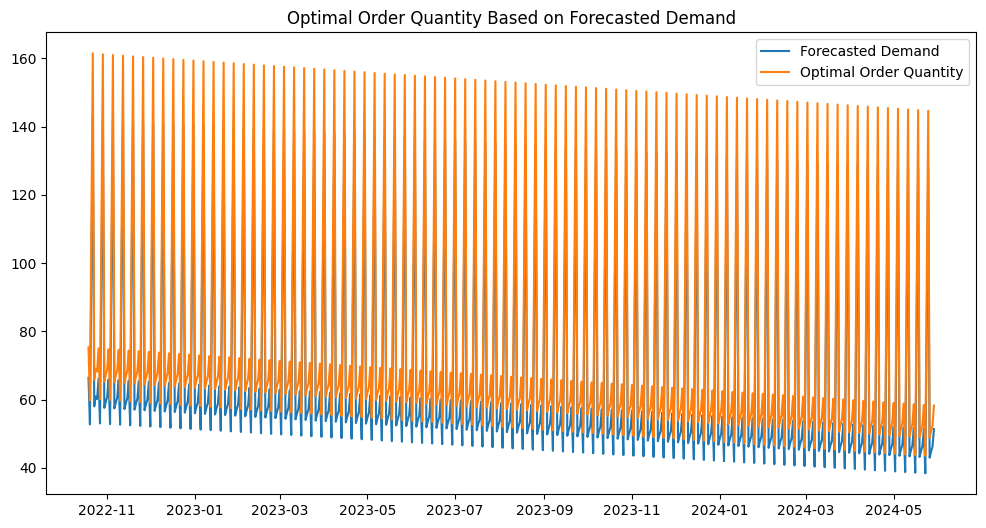

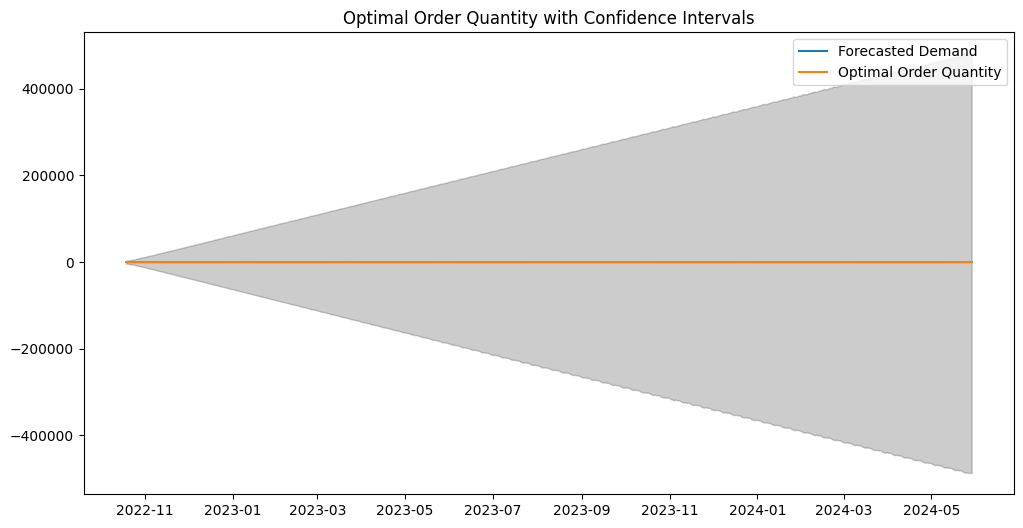

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

def optimal_order_quantity(demand_forecast, cost, price, shipping_cost, clearance_price):
    # Calculate adjusted cost and price based on given cost and price
    c_tilde = cost + shipping_cost
    p_tilde = price - clearance_price
    return demand_forecast * (p_tilde / c_tilde)

def monte_carlo_simulation(model, steps, num_simulations, cost, price, shipping_cost, clearance_price):
    simulated_quantities = []
    for _ in range(num_simulations):
        simulated_demand = model.simulate(nsimulations=steps)
        optimal_quantity = optimal_order_quantity(simulated_demand, cost, price, shipping_cost, clearance_price)
        simulated_quantities.append(optimal_quantity)
    return np.array(simulated_quantities)

def main():
    # Load data
    data = pd.read_excel('/content/BakeryData2024_Vilnius.xlsx')  # Modify to your file path

    # Data preprocessing
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)

    # Assume the demand column is 'main street A', modify according to actual situation
    demand_column = 'main street A'

    # Check autocorrelation
    plt.figure(figsize=(12, 6))
    sm.graphics.tsa.plot_acf(data[demand_column], lags=30, ax=plt.gca())
    plt.title('ACF of Daily Demand')
    plt.show()

    plt.figure(figsize=(12, 6))
    sm.graphics.tsa.plot_pacf(data[demand_column], lags=30, ax=plt.gca())
    plt.title('PACF of Daily Demand')
    plt.show()

    # Split train and test sets
    train, test = train_test_split(data[[demand_column]], test_size=0.2, shuffle=False)

    # Fit SARIMA model
    model = SARIMAX(train[demand_column], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
    results = model.fit()

    # Model summary
    print(results.summary())

    # Forecast future demand
    forecast = results.get_forecast(steps=len(test))
    forecast_ci = forecast.conf_int()

    # Plot forecast results
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train[demand_column], label='Train')
    plt.plot(test.index, test[demand_column], label='Test')
    plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast')
    plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.2)
    plt.legend()
    plt.title('Demand Forecast with SARIMA Model')
    plt.show()

    # Assume costs and prices
    cost = 3.85
    price = 4.64
    shipping_cost = 0.11
    clearance_price = 0.15

    # Forecasted demand
    demand_forecast = forecast.predicted_mean

    # Calculate optimal order quantity
    optimal_quantity = optimal_order_quantity(demand_forecast, cost, price, shipping_cost, clearance_price)

    # Plot optimal order quantity
    plt.figure(figsize=(12, 6))
    plt.plot(demand_forecast.index, demand_forecast, label='Forecasted Demand')
    plt.plot(optimal_quantity.index, optimal_quantity, label='Optimal Order Quantity')
    plt.legend()
    plt.title('Optimal Order Quantity Based on Forecasted Demand')
    plt.show()

    # Perform Monte Carlo simulation
    num_simulations = 2000
    simulated_quantities = monte_carlo_simulation(results, steps=len(test), num_simulations=num_simulations,
                                                  cost=cost, price=price, shipping_cost=shipping_cost,
                                                  clearance_price=clearance_price)

    # Calculate confidence intervals
    conf_int_lower = np.percentile(simulated_quantities, 2.5, axis=0)
    conf_int_upper = np.percentile(simulated_quantities, 97.5, axis=0)

    # Plot confidence intervals
    plt.figure(figsize=(12, 6))
    plt.plot(test.index, demand_forecast, label='Forecasted Demand')
    plt.plot(test.index, optimal_quantity, label='Optimal Order Quantity')
    plt.fill_between(test.index, conf_int_lower, conf_int_upper, color='k', alpha=0.2)
    plt.legend()
    plt.title('Optimal Order Quantity with Confidence Intervals')
    plt.show()

if __name__ == '__main__':
    main()
